### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [2]:
# параметры объекта 
c0 = -12.7
c1 = 4.3
c2 = -1.8
c3 = 9.1
c4 = 2.4
c_0 = [c0,c1,c2,c3,c4]

In [3]:
# количество измерений
N=300

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [4]:
import numpy as np
from scipy.stats import rv_continuous

In [5]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [6]:
alpha = 0.1
sigma_1 = 0.5
sigma_2 = 10
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

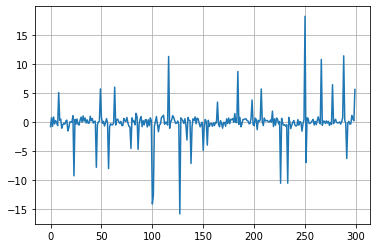

In [8]:
plt.plot(Noise)
plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [9]:
#Ваш код здесь
Avg_U1=1
Var_U1=50
Avg_U2=1
Var_U2=50
Avg_U3=1
Var_U3=50
Avg_U4=1
Var_U4=50

In [10]:
#Ваш код здесь
U1=np.random.normal(Avg_U1, Var_U1, N)
U2=np.random.normal(Avg_U2, Var_U2, N)
U3=np.random.normal(Avg_U3, Var_U3, N)
U4=np.random.normal(Avg_U4, Var_U4, N)
U = np.vstack(([1]*N,U1,U2,U3,U4))

In [11]:
# моделирование выхода объекта
y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise

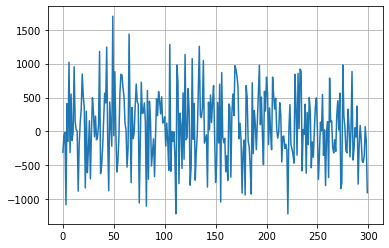

In [12]:
plt.plot(y)
plt.grid()

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

In [13]:
from sympy import *
from sympy.abc import x

def integr(t):
    return float(integrate(x**2*exp(-x**2 / 2. /sigma_1**2), (x, -t, t)))

class Huber():
    
    def __init__(self, l, ksi):
        self.l = l
        self.ksi = ksi
        self.delta = ksi*sigma_1
        self.coef = []
        self.if_f = 2*(1-alpha)*(self.delta/sigma_1**2)*exp(-self.delta/sigma_1**2/(2*sigma_1**2))/(sigma_1*sqrt(2*pi))+(1-alpha)*(1/(sqrt(2*pi)*sigma_1**5))*integr(self.delta)
        
    def fit(self,x,y,c0):
        self.coef.append(c0)
        G = np.eye(5)*self.l      
        for i in range(1,len(y)):
            z = np.array([[x[0][i], x[1][i], x[2][i], x[3][i], x[4][i]]]).transpose()
            G = G - G*z*z.transpose()*G/(1/self.if_f.n()+z.transpose()*G*z)
            eps = y[i] - float(z.transpose()*c0)
            if eps <= -self.delta:
                d = -self.delta
            elif eps >= self.delta:
                d = self.delta
            else:
                d = eps
            c0 = c0 + d*G.dot(z)
            
            self.coef.append(c0)
            
    def get_coefs(self):
        return self.coef
    
class RecurrentMLS():
    
    def __init__(self,l):
        self.l=l
        self.coef = []
        
    def fit(self,x, y, c0):
        self.coef.append(c0)
        G=self.l*np.eye(5)
        for i in range(1,len(y)):
            z = np.array([[x[0][i], x[1][i], x[2][i], x[3][i], x[4][i]]]).transpose()
            G = G - G*z*z.transpose()*G/(1+z.transpose()*G*z)
            eps = y[i] - float(z.transpose()*c0)
            c0=c_0 + eps*G.dot(z)
            
            self.coef.append(c0)
            
    def get_coefs(self):
        return self.coef

In [50]:
def smooth_errors(c_estim,c_true):
    N=300
    err=[]
    for i in range(10,N):
        t_0=0
        for j in range(10):
            for k in range(4):
                t_0 += (c_estim[i-j][k]-c_true[k])**2
        err.append(np.sqrt(float(t_0)/10))
    return err

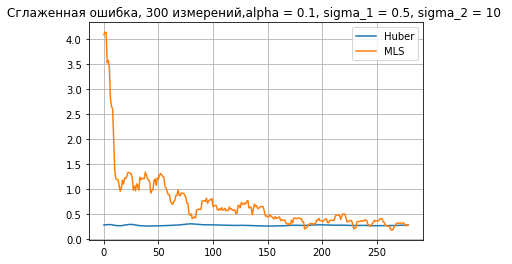

In [52]:
c_0=np.asmatrix((-12,4,-2,9,4)).transpose()
l = 0.1
ksi = 2

h = Huber(l,ksi)
h.fit(U,y,c_0)

r = RecurrentMLS(l)
r.fit(U,y,c_0)

err1 = smooth_errors(h.get_coefs(), c_0)
err2 = smooth_errors(r.get_coefs(), c_0)

plt.title("Сглаженная ошибка, 300 измерений,alpha = 0.1, sigma_1 = 0.5, sigma_2 = 10 ")
plt.plot(err1[10:],label='Huber')
plt.plot(err2[10:],label='MLS')
plt.grid()
plt.legend()
plt.show()

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)